# Hello to scikit-learn
DIAS ML course by MT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

# Hello world - Linear fit (Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# initialize the model/classifier 
model = LinearRegression(normalize=True)

In [5]:
model?

In [6]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [7]:
# see the hyperparameters
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [8]:
print(model.fit_intercept)

True


In [17]:
# Create some dummy data
x = np.arange(10.)
y = 2. * x + 1. + 2*np.random.randn(10)
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 4.05555711  4.4917076   0.52216186  5.65728391  9.76561966 10.74509982
 13.24304001 15.81610779 19.0248103  19.14863866]


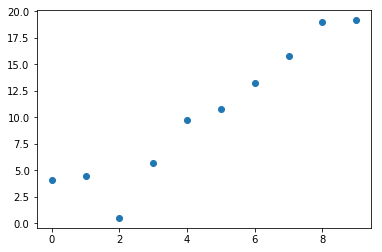

In [18]:
plt.plot(x, y, 'o');

In [19]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[ 4.05555711  4.4917076   0.52216186  5.65728391  9.76561966 10.74509982
 13.24304001 15.81610779 19.0248103  19.14863866]


In [20]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [21]:
# underscore at the end indicates a fit parameter,
# each estimator can have different parameters
print(model.coef_)
print(model.intercept_)

[2.04712685]
1.0349318270138212


In [22]:
# evaluate/predict unseen
test_data = np.array([3.3, 8.5]).reshape(-1,1)
print(test_data.shape)
y_test_data = model.predict(test_data)
print(y_test_data)

(2, 1)
[ 7.79045045 18.43551009]


In [23]:
# evaluate performance
from sklearn.metrics import mean_squared_error
mean_squared_error(y, model.predict(X))

3.812040906510371

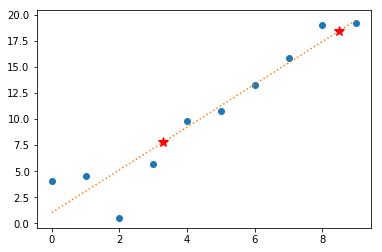

In [24]:
plt.plot(x, y, 'o');
plt.plot(x, model.predict(X),":")
plt.plot(test_data, y_test_data, 'r*', markersize=10)

# Less dummy classification

In [26]:
# hand written digits
from sklearn.datasets import load_digits
digits = load_digits()

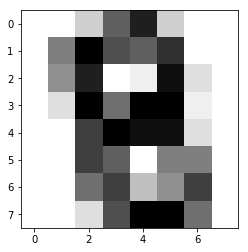

In [27]:
plt.imshow(digits.data[500].reshape(8,8), cmap=plt.cm.binary, interpolation=None)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=142)

In [46]:
X_train.shape

(1347, 64)

In [47]:
print(np.bincount(y_train))
print(len(np.unique(y_train)))

[126 134 127 132 135 151 131 141 135 135]
10


In [48]:
from sklearn.svm import LinearSVC

In [49]:
# initialize
svm = LinearSVC()
# fit
svm.fit(X_train, y_train)
# predict/evaluate
y_pred = svm.predict(X_test)

/Users/toast/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
print(svm.predict(X_train))
print(y_train)

[6 5 0 ... 5 4 1]
[6 5 0 ... 5 4 1]


In [51]:
svm.score(X_train, y_train)

0.9888641425389755

In [52]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.95


In [53]:
svm.score(X_test, y_test)

0.9466666666666667

In [54]:
# newer version of API
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9466666666666667

In [56]:
from sklearn import metrics
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))

('accuracy:', 0.9466666666666667)
('precision:', 0.9506326718721675)
('recall:', 0.9466666666666667)
('f1 score:', 0.9468223176845256)


In [58]:
print(metrics.classification_report(y_test, y_pred,
                                    target_names=['%s'%i for i in range(10)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.95      0.83      0.89        48
           2       0.98      1.00      0.99        50
           3       0.88      0.90      0.89        51
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        31
           6       0.98      1.00      0.99        50
           7       0.97      0.97      0.97        38
           8       0.80      1.00      0.89        39
           9       0.97      0.87      0.92        45

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [61]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  2  0  1  1  0  3  1]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  1 46  0  0  0  0  4  0]
 [ 0  1  0  0 44  0  0  0  1  0]
 [ 0  1  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  1  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  2  0  1  0  1  2 39]]


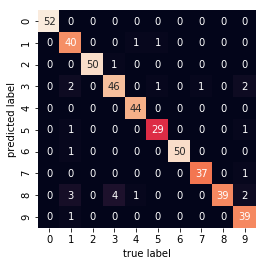

In [62]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

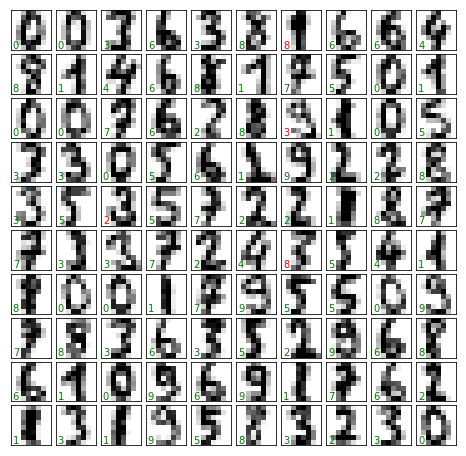

In [63]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

# .predict_proba()
Some of the models have a method *predict_proba*, to inspect probabilites of belonging to individual classes.

Use *sklearn.svm.SVC*, check the model doc, and try to see what would be the probabilities of being what number of a randomly generated image

In [64]:
noise = 1.*np.random.choice(16,size=64)
noise.shape

(64,)

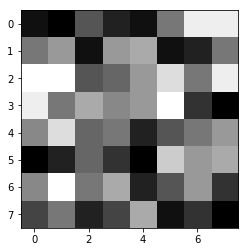

In [65]:
plt.imshow(noise.reshape(8,8), cmap=plt.cm.binary, interpolation=None)

In [66]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train)

/Users/toast/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
noise_pred = clf.predict(noise[None,:])
print(noise_pred[0])

5


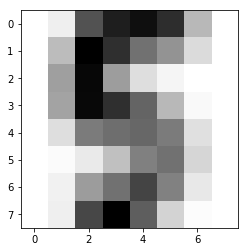

In [68]:
what = np.mean(digits.data[digits.target==noise_pred[0],:], axis=0)
plt.imshow(what.reshape(8,8), cmap=plt.cm.binary, interpolation=None)

<BarContainer object of 10 artists>

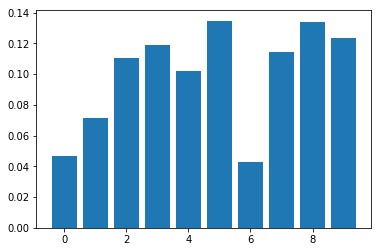

In [69]:
plt.bar(np.arange(10),clf.predict_proba(noise[None,:])[0])